In [12]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [13]:
csv_path='static/data/BBG_price_data.csv'

In [24]:
df = pd.read_csv(csv_path)
df

,Date,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
0,1/4/2010,418.50,557.75,1049.50,76.00,85.375
1,1/5/2010,418.75,553.00,1052.25,73.12,86.325
2,1/6/2010,421.75,567.25,1050.50,73.55,85.950
3,1/7/2010,417.50,557.75,1017.75,72.89,85.925
4,1/8/2010,423.00,568.50,1013.00,72.44,85.825
...,...,...,...,...,...,...
2896,7/2/2021,697.25,645.75,1451.75,86.03,122.000
2897,7/6/2021,656.00,620.00,1363.75,86.38,122.400
2898,7/7/2021,652.50,614.75,1386.50,86.63,120.600
2899,7/8/2021,638.00,612.25,1390.25,85.88,119.275


ERROR! Session/line number was not unique in database. History logging moved to new session 1192


In [20]:
!pip install psycopg2

In [16]:
from sqlalchemy import create_engine
import psycopg2 
con_str = 'postgres:myAkina93!@database-1.c6qqzgohsabf.us-east-2.rds.amazonaws.com:5432/project2'
engine = create_engine(f'postgresql://{con_str}')

In [21]:
df.to_sql(name='price_raw_data', con=engine, if_exists='append', index=False)

ERROR! Session/line number was not unique in database. History logging moved to new session 1186


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 0 to 2900
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2901 non-null   object 
 1   Corn Price     2901 non-null   float64
 2   Wheat Price    2901 non-null   float64
 3   Soybean Price  2901 non-null   float64
 4   Cotton Price   2901 non-null   float64
 5   Live Cattle    2901 non-null   float64
dtypes: float64(5), object(1)
memory usage: 136.1+ KB


ERROR! Session/line number was not unique in database. History logging moved to new session 1201


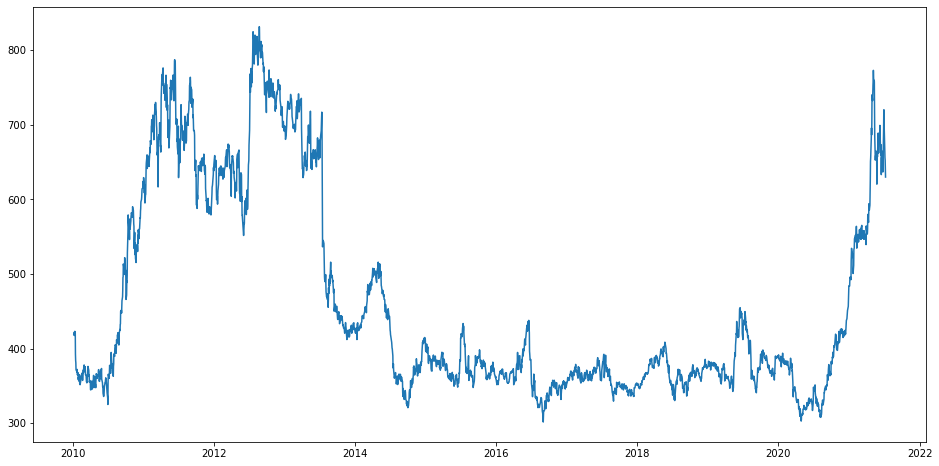

In [31]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df = df.set_index('Date', drop=True) 

plt.figure(figsize=(16,8))
plt.plot(df["Corn Price"],label='Corn Price history')

In [34]:
# data_df.sort_index(ascending=True,axis=0)
corn_df=df[['Corn Price']]
corn_df.head()

,Corn Price
Date,
2010-01-04,418.50
2010-01-05,418.75
2010-01-06,421.75
2010-01-07,417.50
2010-01-08,423.00


In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset = corn_df.values

final_dataset=scaler.fit_transform(final_dataset)

train_data=final_dataset[0:1450,:]
valid_data=final_dataset[1450:,:]

In [42]:
df.head()

,Corn Price,Wheat Price,Soybean Price,Cotton Price,Live Cattle
Date,,,,,
2010-01-04,418.50,557.75,1049.50,76.00,85.375
2010-01-05,418.75,553.00,1052.25,73.12,86.325
2010-01-06,421.75,567.25,1050.50,73.55,85.950
2010-01-07,417.50,557.75,1017.75,72.89,85.925
2010-01-08,423.00,568.50,1013.00,72.44,85.825


In [43]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [45]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# inputs_data=final_dataset[len(final_dataset)-len(valid_data)-60:]
# inputs_data=inputs_data.reshape(-1,1)
# inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)


ERROR! Session/line number was not unique in database. History logging moved to new session 1204
Epoch 1/1
 - 175s - loss: 0.0039
